# Sales Prediction 

*Machine learning in sales forecasting enables you to generate accurate forecasts, monitor market trends, and make data-driven decisions. Superior sales forecast accuracy is now accessible to all businesses. No-code predictive analytics yield a 73% increase in sales forecasting accuracy.*

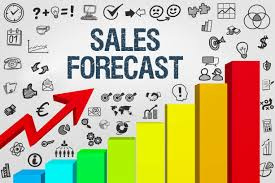

# Importing Libraries

In [85]:
import pandas as pd
import plotly.express as px
from sklearn.linear_model  import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings(category=UserWarning,action='ignore')

In [86]:
data=pd.read_csv('Sales.csv')
df=pd.DataFrame(data)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Data Pre-Processing

In [87]:
df=df.drop(['Invoice ID','Date','Time','Tax 5%','gross margin percentage','cogs','gross income'],axis='columns')
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,Ewallet,5.3


In [88]:
le=LabelEncoder()
df['Branch']=le.fit_transform(df['Branch'])
df['City']=le.fit_transform(df['City'])
df['Customer type']=le.fit_transform(df['Customer type'])
df['Gender']=le.fit_transform(df['Gender'])
df['Product line']=le.fit_transform(df['Product line'])
df['Payment']=le.fit_transform(df['Payment'])
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,Rating
0,0,2,0,0,3,74.69,7,548.9715,2,9.1
1,2,1,1,0,0,15.28,5,80.2200,0,9.6
2,0,2,1,1,4,46.33,7,340.5255,1,7.4
3,0,2,0,1,3,58.22,8,489.0480,2,8.4
4,0,2,1,1,5,86.31,7,634.3785,2,5.3


In [89]:
x=df.drop(['Total','Rating'],axis='columns')
x.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Payment
0,0,2,0,0,3,74.69,7,2
1,2,1,1,0,0,15.28,5,0
2,0,2,1,1,4,46.33,7,1
3,0,2,0,1,3,58.22,8,2
4,0,2,1,1,5,86.31,7,2


In [90]:
y=df[['Total','Rating']]
y.head()

,Total,Rating
0,548.9715,9.1
1,80.2200,9.6
2,340.5255,7.4
3,489.0480,8.4
4,634.3785,5.3


# Data Splitting and Training the Model

In [91]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)
xtrain.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Payment
690,2,1,0,0,5,70.19,9,0
996,1,0,1,0,4,97.38,10,2
917,0,2,1,0,1,94.67,4,0
270,1,0,1,0,5,67.43,5,2
92,0,2,0,0,5,21.98,7,2


In [92]:
lm=LinearRegression()
lm.fit(xtrain,ytrain)
lm

LinearRegression()

In [93]:
lm.score(xtest,ytest)

0.4406597229246922

In [94]:
lm.predict([[0,2,0,1,3,58.22,8,2]])

array([[476.71096339,   6.98669949]])

# Visualisation

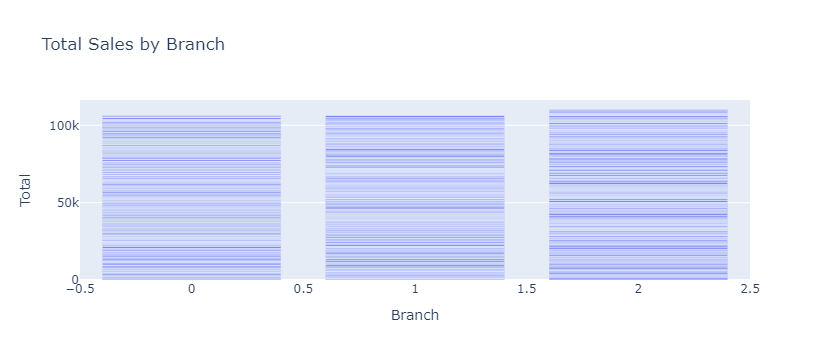

In [95]:
fig=px.bar(df, x='Branch', y='Total', title='Total Sales by Branch')
fig.show()

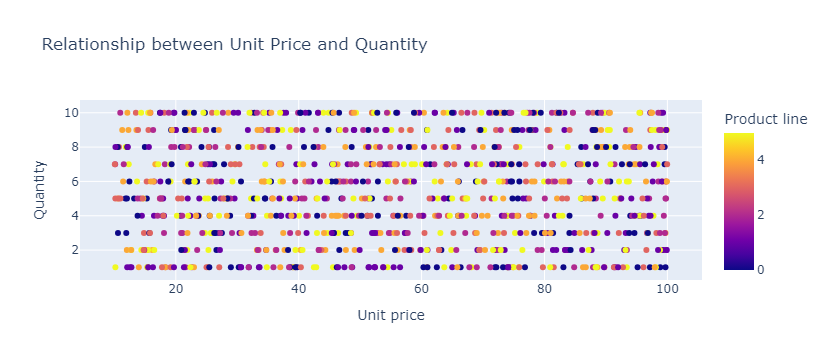

In [96]:
fig=px.scatter(df, x='Unit price', y='Quantity', color='Product line', title='Relationship between Unit Price and Quantity')
fig.show()

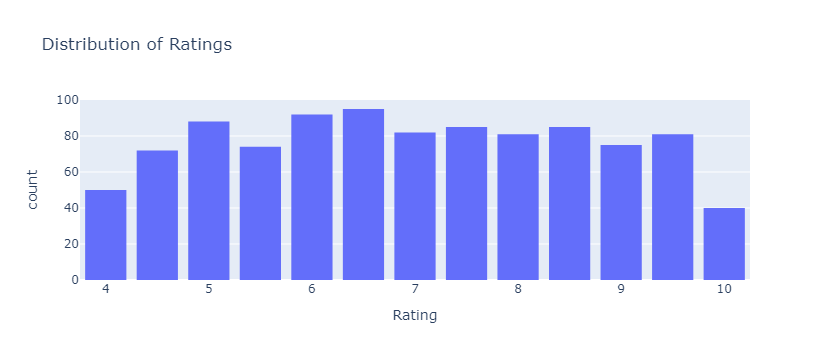

In [97]:
fig=px.histogram(df, x='Rating', title='Distribution of Ratings')
fig.update_layout(bargap=0.2)
fig.show()


# Great Job...!!!